In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [3]:
# Load your dataset
df = pd.read_csv('Pharmaceutical Drug Spending by countries.csv')
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16


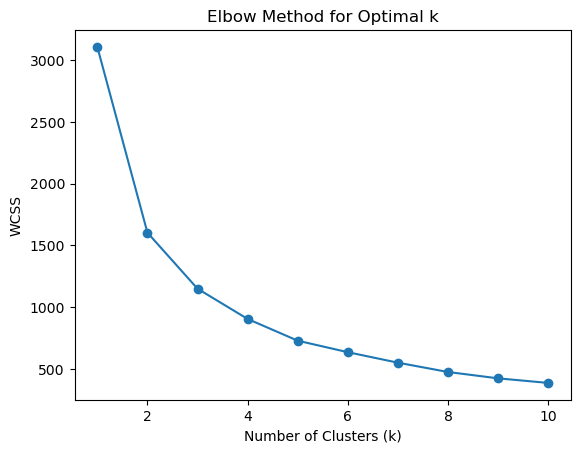

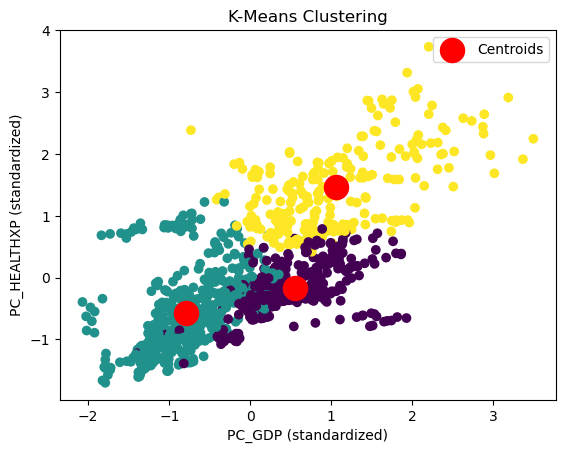

In [17]:
# Select relevant features for clustering
X = df[['PC_GDP', 'PC_HEALTHXP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('PC_HEALTHXP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [31]:
# Assuming you have already standardized the features and performed K-Means clustering

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Cluster,PCA1,PCA2
0,AUS,1971,15.992,0.727,35.720,NaN,462.11,1,-1.410976,0.385559
1,AUS,1972,15.091,0.686,36.056,NaN,475.11,1,-1.524841,0.270799
2,AUS,1973,15.117,0.681,39.871,NaN,533.47,1,-1.519515,0.263570
3,AUS,1974,14.771,0.755,47.559,NaN,652.65,1,-1.421495,0.247670
4,AUS,1975,11.849,0.682,47.561,NaN,660.76,1,-1.712908,-0.093248
...,...,...,...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,NaN,300935.91,3,5.581010,-6.339400
1032,USA,2012,11.459,1.874,964.237,NaN,302768.85,3,5.483503,-6.441989
1033,USA,2013,11.384,1.858,980.864,NaN,310154.01,3,5.579380,-6.615831
1034,USA,2014,11.968,1.981,1081.402,NaN,344495.16,3,6.412666,-7.271506


In [32]:
print(df.groupby('Cluster')['LOCATION'].count())

Cluster
0    297
1    510
2    214
3     15
Name: LOCATION, dtype: int64


In [41]:
# Loop through each cluster and print unique locations (countries) within each
for cluster_id in range(k):
    print(f"\nCountries in Cluster {1}:")
    unique_countries = df[df['Cluster'] == 1]['LOCATION'].unique()
    print(unique_countries)



Countries in Cluster 1:
['AUS' 'AUT' 'BEL' 'CAN' 'CHE' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA'
 'GBR' 'GRC' 'IRL' 'ISL' 'ISR' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'NZL'
 'PRT' 'SWE' 'TUR']

Countries in Cluster 1:
['AUS' 'AUT' 'BEL' 'CAN' 'CHE' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA'
 'GBR' 'GRC' 'IRL' 'ISL' 'ISR' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'NZL'
 'PRT' 'SWE' 'TUR']

Countries in Cluster 1:
['AUS' 'AUT' 'BEL' 'CAN' 'CHE' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA'
 'GBR' 'GRC' 'IRL' 'ISL' 'ISR' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'NZL'
 'PRT' 'SWE' 'TUR']

Countries in Cluster 1:
['AUS' 'AUT' 'BEL' 'CAN' 'CHE' 'CZE' 'DEU' 'DNK' 'ESP' 'EST' 'FIN' 'FRA'
 'GBR' 'GRC' 'IRL' 'ISL' 'ISR' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NOR' 'NZL'
 'PRT' 'SWE' 'TUR']


In [42]:
# Export the DataFrame with cluster labels to a CSV file
df.to_csv('clustered_data.csv', index=False)

In [ ]:
# Select relevant features for clustering
X = df[['PC_GDP', 'PC_HEALTHXP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

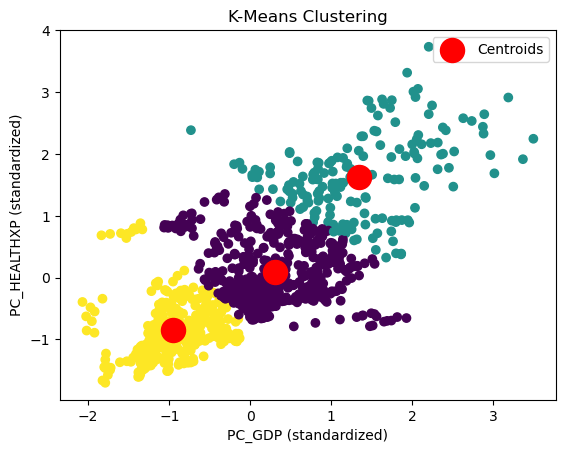

In [9]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('PC_HEALTHXP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
X = df[['PC_GDP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

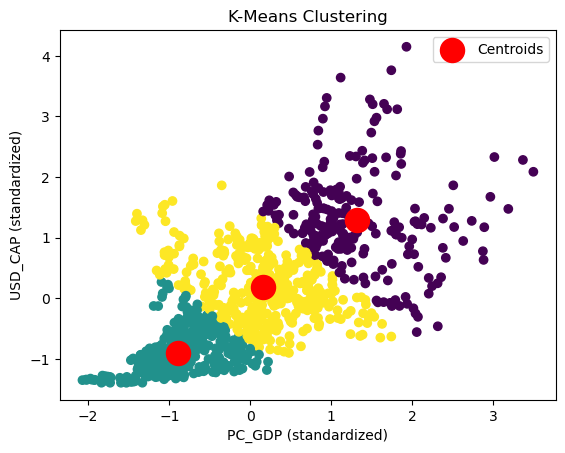

In [11]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_GDP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
X = df[['PC_HEALTHXP', 'USD_CAP']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

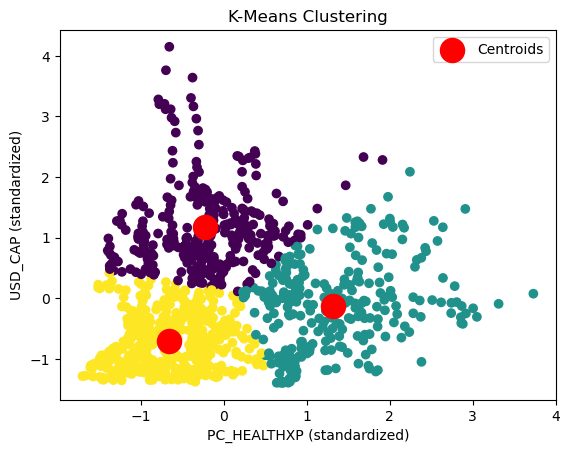

In [13]:
# Fit K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Interpret and visualize
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot clusters (example with first two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PC_HEALTHXP (standardized)')
plt.ylabel('USD_CAP (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

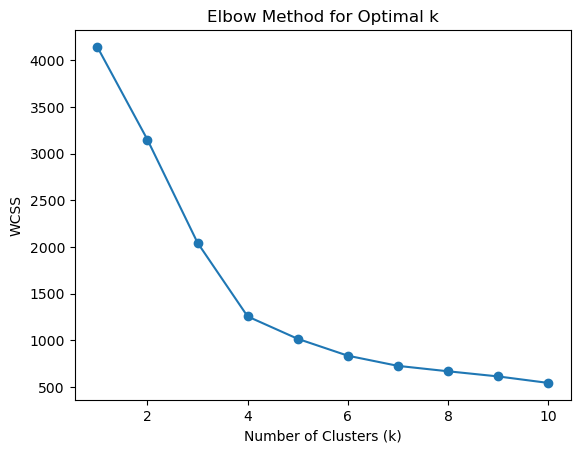

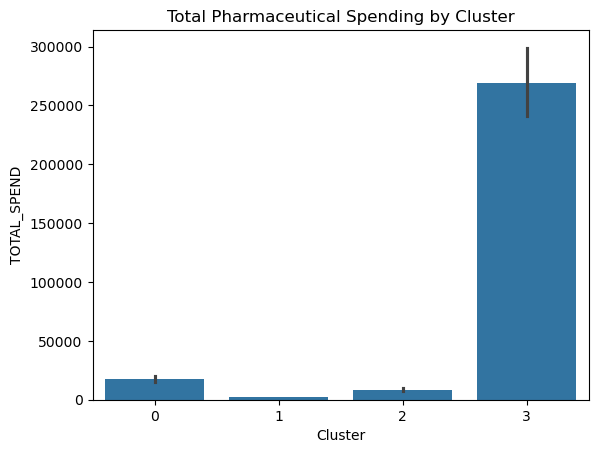

In [29]:
# Select relevant features for clustering
X = df[['PC_GDP', 'PC_HEALTHXP', 'USD_CAP', 'TOTAL_SPEND']]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with the chosen number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df

import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of TOTAL_SPEND by cluster
sns.barplot(x='Cluster', y='TOTAL_SPEND', data=df)
plt.title('Total Pharmaceutical Spending by Cluster')
plt.show()

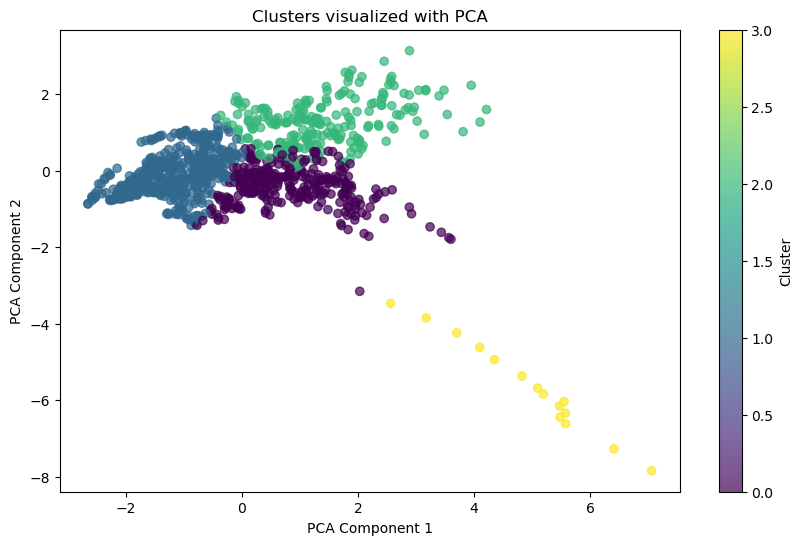

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and clusters to DataFrame for easier plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the PCA components with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters visualized with PCA')
plt.colorbar(label='Cluster')
plt.show()


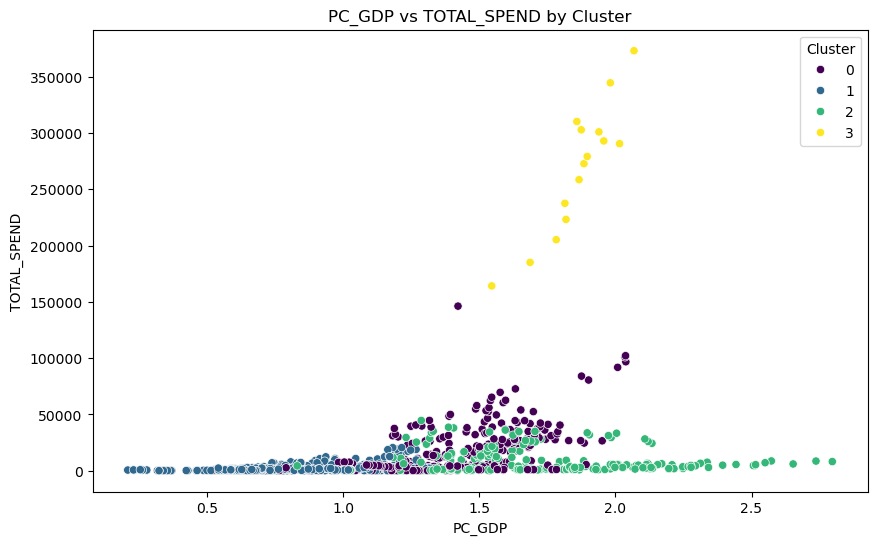

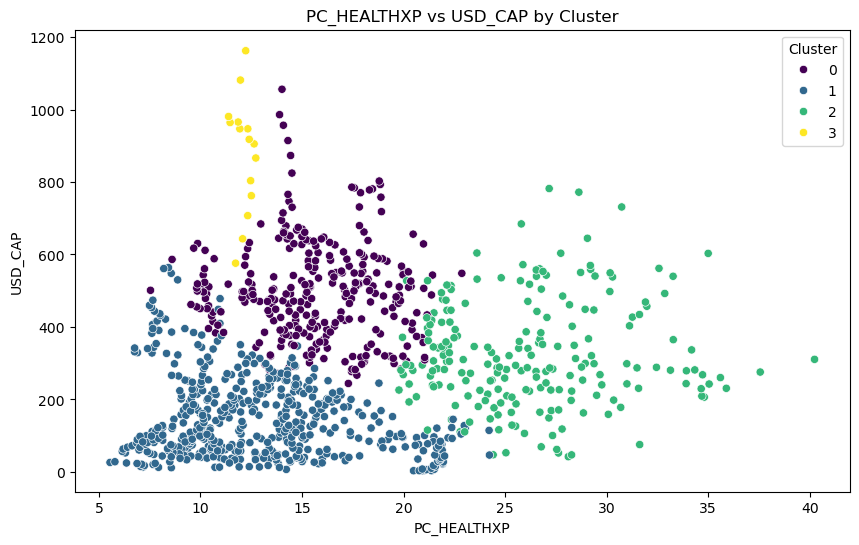

In [24]:
import seaborn as sns

# Plot PC_GDP vs TOTAL_SPEND by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_GDP', y='TOTAL_SPEND', hue='Cluster', data=df, palette='viridis', marker='o')
plt.title('PC_GDP vs TOTAL_SPEND by Cluster')
plt.show()

# Plot PC_HEALTHXP vs USD_CAP by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC_HEALTHXP', y='USD_CAP', hue='Cluster', data=df, palette='viridis', marker='o')
plt.title('PC_HEALTHXP vs USD_CAP by Cluster')
plt.show()


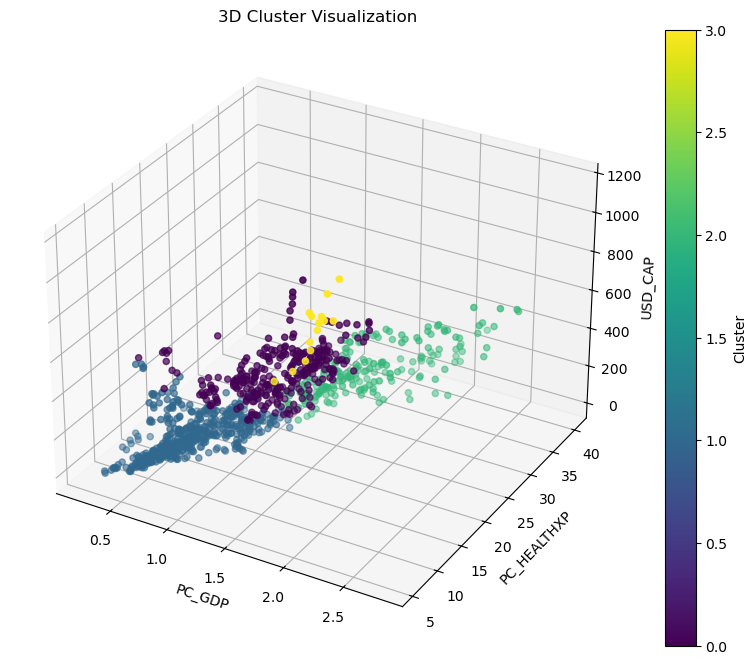

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using three features, color-coded by cluster
scatter = ax.scatter(df['PC_GDP'], df['PC_HEALTHXP'], df['USD_CAP'], c=df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('PC_GDP')
ax.set_ylabel('PC_HEALTHXP')
ax.set_zlabel('USD_CAP')
plt.title('3D Cluster Visualization')
plt.colorbar(scatter, label='Cluster')
plt.show()


/var/folders/vk/7f5v13993c58cswjwb8_rwvm0000gq/T/ipykernel_8397/1197519895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TOTAL_SPEND', data=df, palette='viridis')


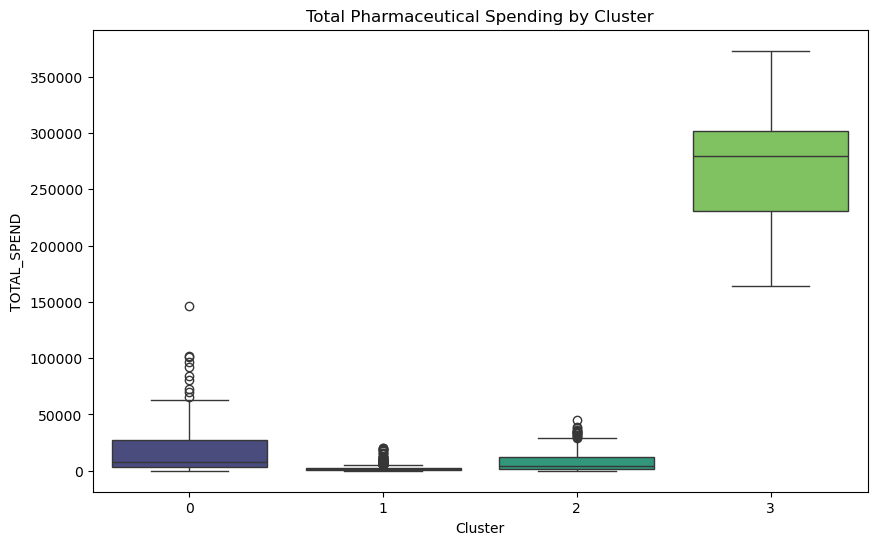

In [26]:
# Box plot of TOTAL_SPEND by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TOTAL_SPEND', data=df, palette='viridis')
plt.title('Total Pharmaceutical Spending by Cluster')
plt.show()
